# Project : Energy_Prediction

# working of combined cycle power plant
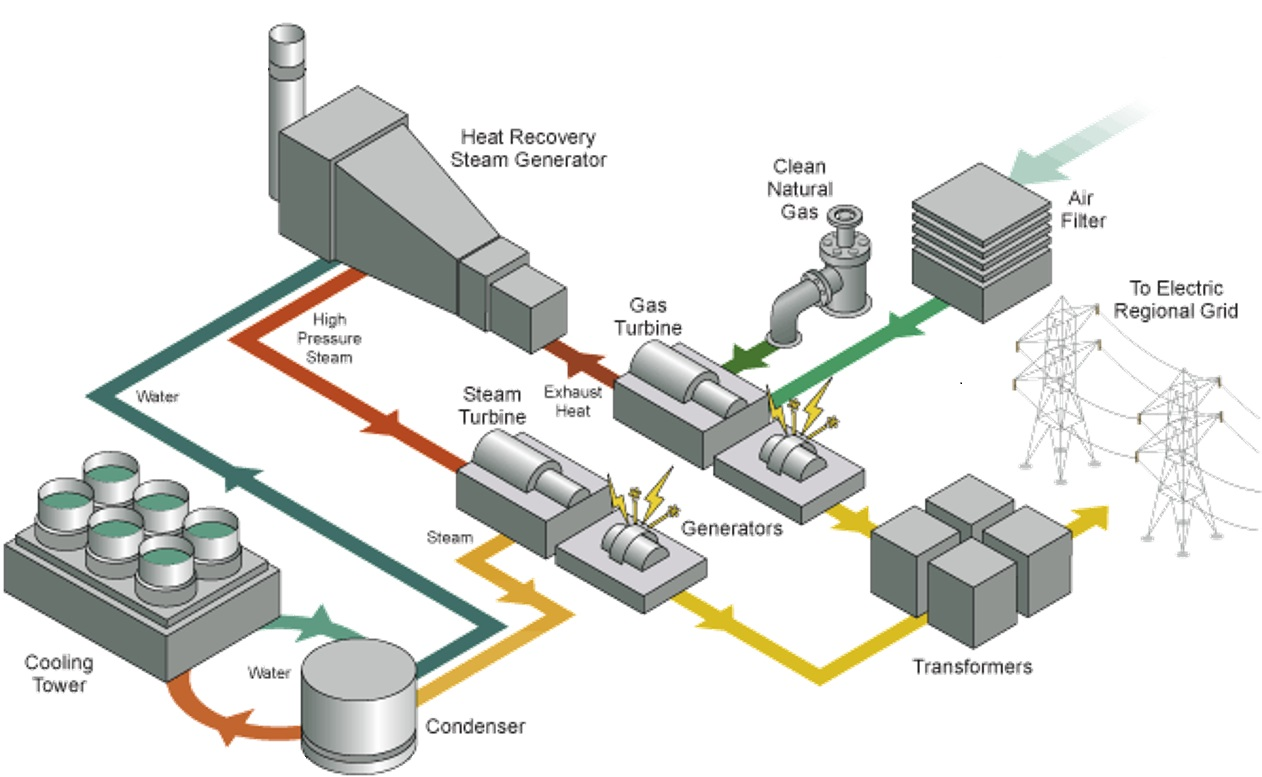

In [1]:
#importing libraries
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('energy_production.csv',sep=';')
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


# Auto EDA by sweetviz

In [3]:
import sweetviz as sv
auto_eda = sv.analyze(df)
#auto_eda.show_html('energy_production.html')

                                             |                                             | [  0%]   00:00 ->…

# EDA by using Klib

In [4]:
import klib
klib.corr_mat(df)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.00,0.84,-0.51,-0.54,-0.95
exhaust_vacuum,0.84,1.00,-0.41,-0.31,-0.87
amb_pressure,-0.51,-0.41,1.00,0.10,0.52
r_humidity,-0.54,-0.31,0.10,1.00,0.39
energy_production,-0.95,-0.87,0.52,0.39,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

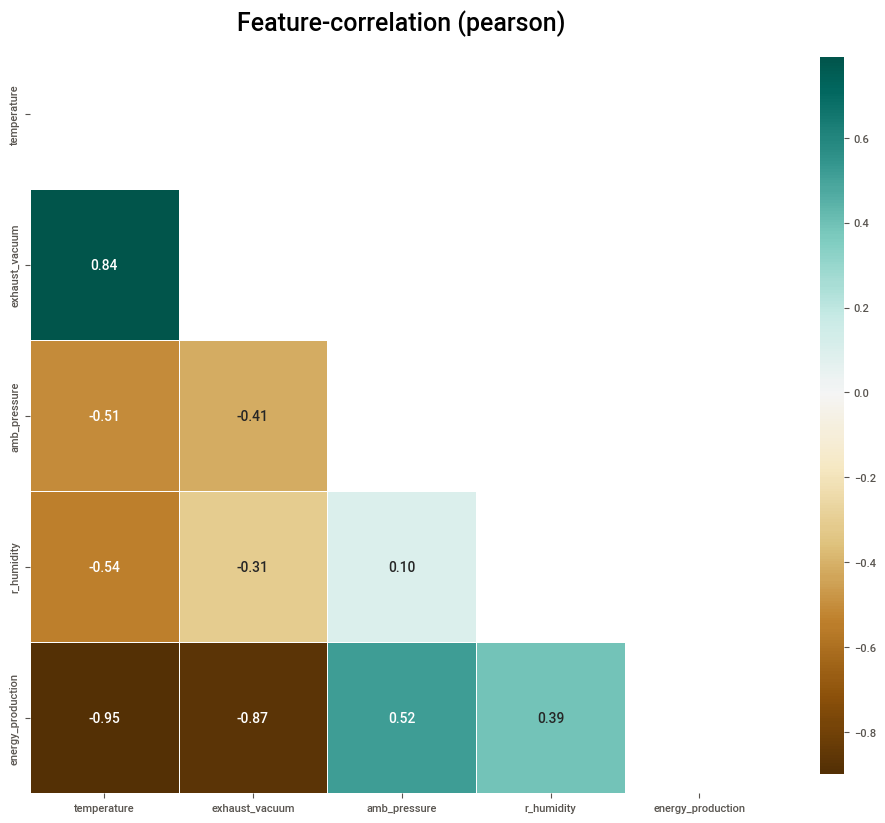

In [5]:
klib.corr_plot(df)

<AxesSubplot:xlabel='energy_production', ylabel='Density'>

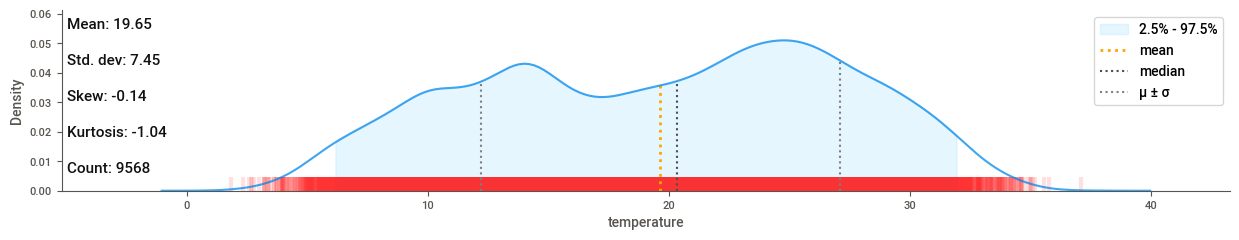

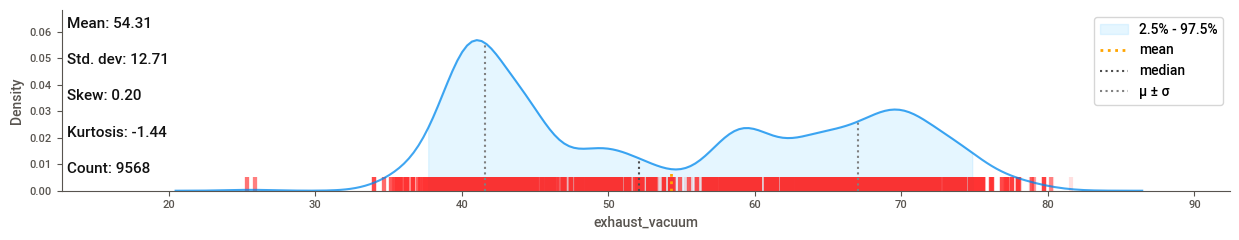

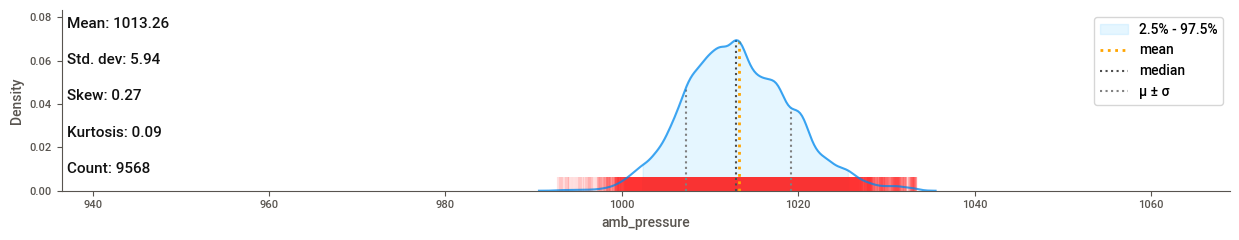

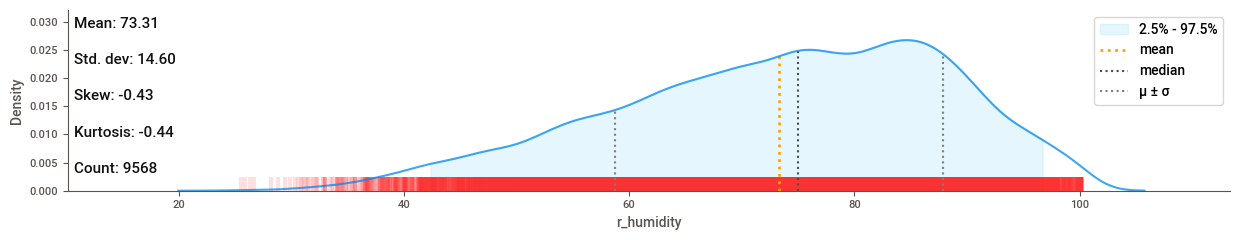

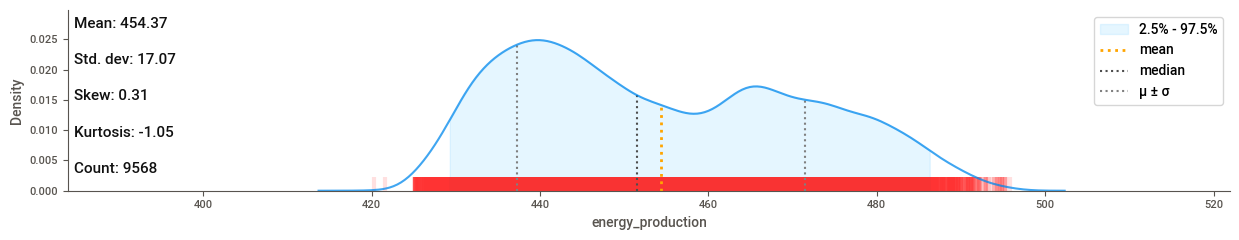

In [6]:
klib.dist_plot(df)

In [7]:
klib.missingval_plot(df)

No missing values found in the dataset.


# Exploratory Data Analysis

In [8]:
df.shape

(9568, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
# Duplicates
df.duplicated().sum()

41

In [11]:
df[df.duplicated()].head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24


In [12]:
#droped duplicates
df_clean=df.drop_duplicates().reset_index( drop = True )
df_clean.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


<AxesSubplot:>

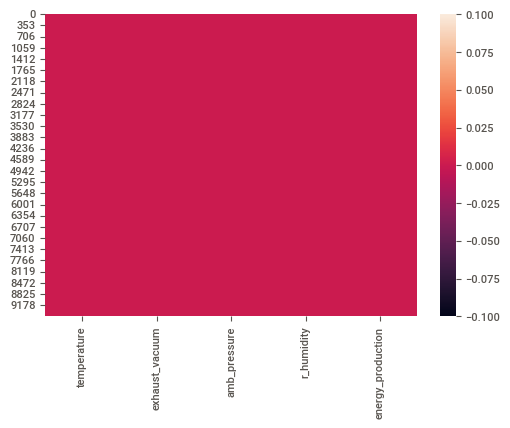

In [13]:
sns.heatmap(df_clean.isnull())

# Boxplot for outlier detection

<AxesSubplot:xlabel='energy_production'>

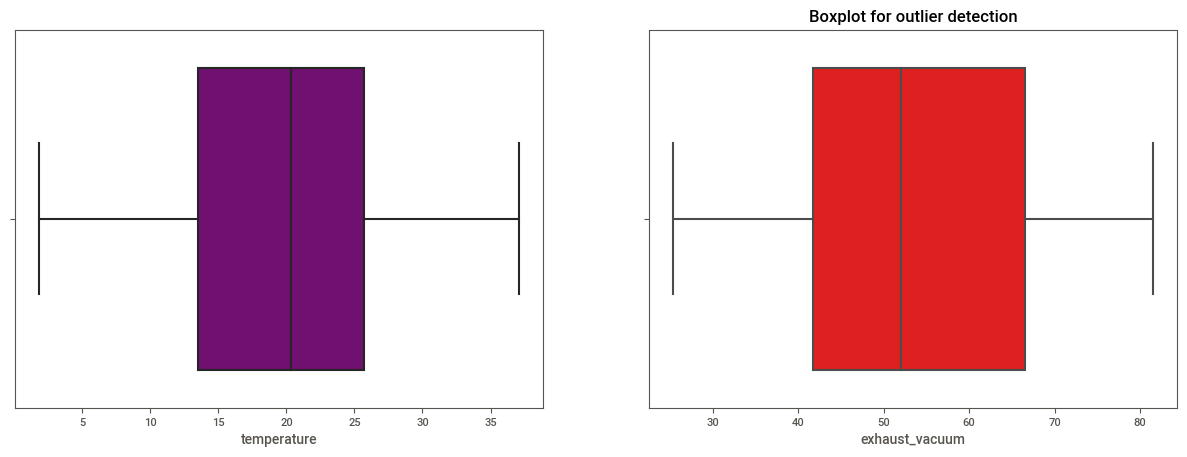

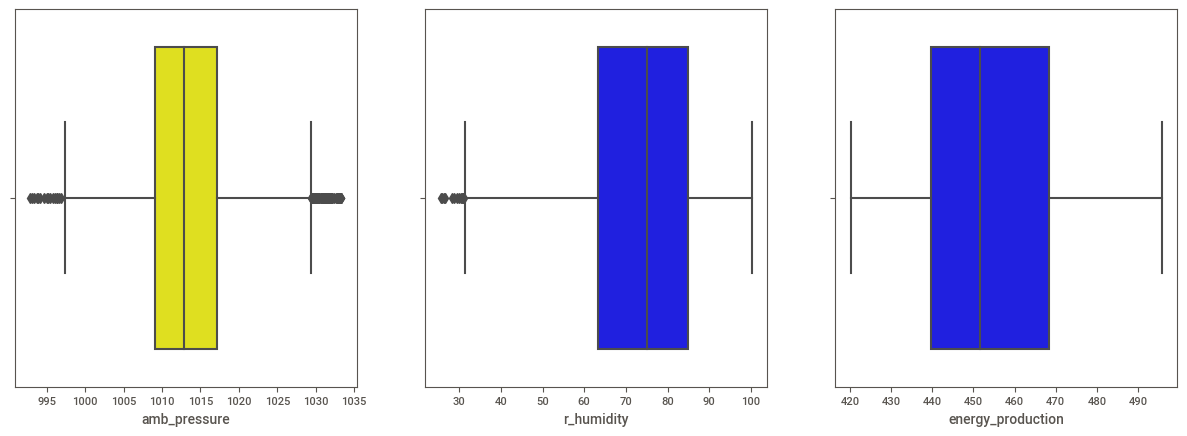

In [14]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
plt.title('Boxplot for outlier detection')
sns.boxplot(x="temperature",data=df_clean,ax=axs[0],color = 'purple')
sns.boxplot(x="exhaust_vacuum",data=df_clean,ax=axs[1],color = 'red')
fig, axs = plt.subplots(ncols=3,figsize=(15, 5))
sns.boxplot(x="amb_pressure",data=df_clean,ax=axs[0],color = 'yellow')
sns.boxplot(x="r_humidity",data=df_clean,ax=axs[1],color = 'blue')
sns.boxplot(x="energy_production",data=df_clean,ax=axs[2],color = 'blue')

# Outlier removed by IQR 

In [15]:
Q1 = df_clean['r_humidity' ].quantile(0.25)
Q3 = df_clean['r_humidity' ].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

21.474999999999994


In [16]:
lower_limit= Q1-1.5*IQR
upper_limit= Q1+1.5*IQR
lower_limit , upper_limit

(31.16250000000001, 95.58749999999999)

In [17]:
df_clean.drop(df_clean[ (df_clean.r_humidity > upper_limit) | (df_clean.r_humidity < lower_limit) ].index , inplace=True)

In [18]:
Q1 = df_clean['amb_pressure' ].quantile(0.25)
Q3 = df_clean['amb_pressure' ].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

8.030000000000086


In [19]:
lower_limit= Q1-1.5*IQR
upper_limit= Q1+1.5*IQR
lower_limit , upper_limit

(997.1149999999998, 1021.2050000000002)

In [20]:
df_clean.drop(df_clean[ (df_clean.amb_pressure > upper_limit) | (df_clean.amb_pressure < lower_limit) ].index , inplace=True)

<AxesSubplot:xlabel='r_humidity'>

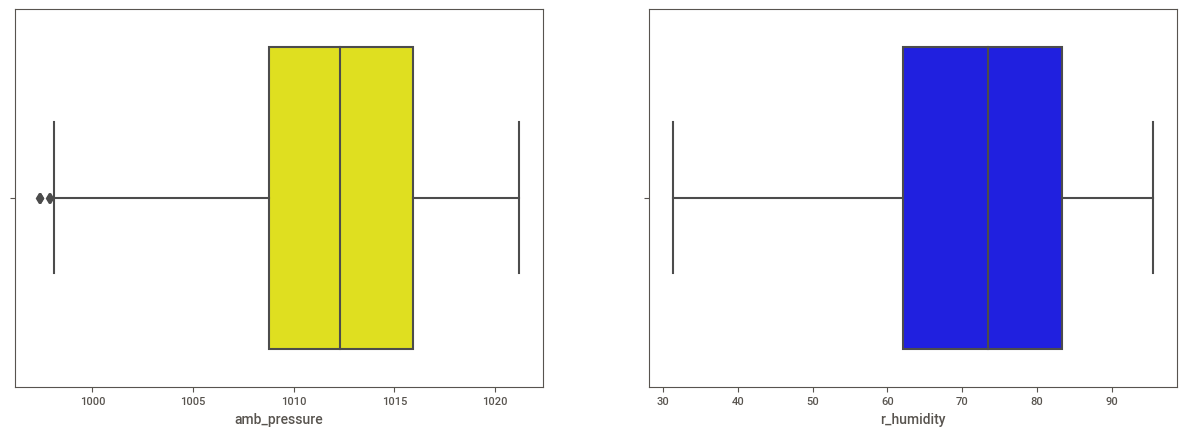

In [21]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x="amb_pressure",data=df_clean,ax=axs[0],color = 'yellow')
sns.boxplot(x="r_humidity",data=df_clean,ax=axs[1],color = 'blue')


In [22]:
df_clean.shape

(8324, 5)

In [23]:
df_clean.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,8324.000000,8324.000000,8324.000000,8324.000000,8324.000000
mean,20.724065,55.830507,1012.195376,71.845625,452.076777
std,7.176298,12.616123,4.810802,14.064828,16.509886
min,2.640000,25.360000,997.340000,31.290000,420.260000
25%,14.850000,43.020000,1008.750000,62.100000,438.530000
50%,21.920000,58.200000,1012.315000,73.480000,448.255000
75%,26.340000,67.790000,1015.940000,83.342500,465.030000
max,35.770000,81.560000,1021.200000,95.580000,495.760000


# linear regression assumstion matching





# from the boxplot and output of describe function it is cleard that there is not diff between{min value and 25%} & {75% and max}

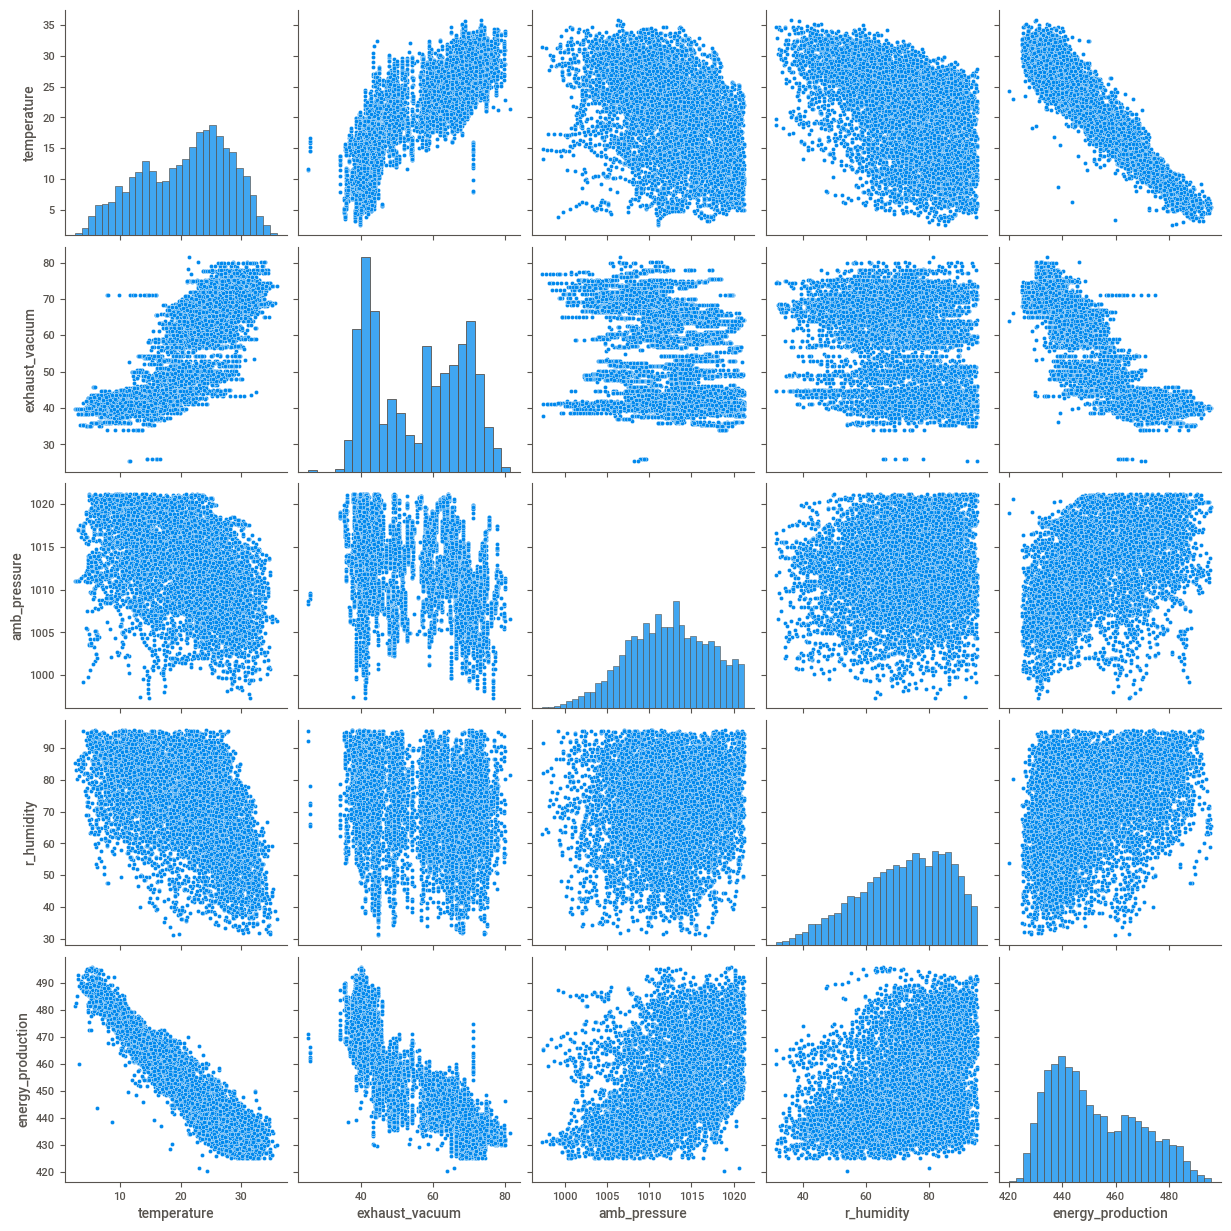

In [24]:
sns.pairplot(data=df_clean)

# Checking linearity between independent and dependent variables

<AxesSubplot:xlabel='r_humidity', ylabel='energy_production'>

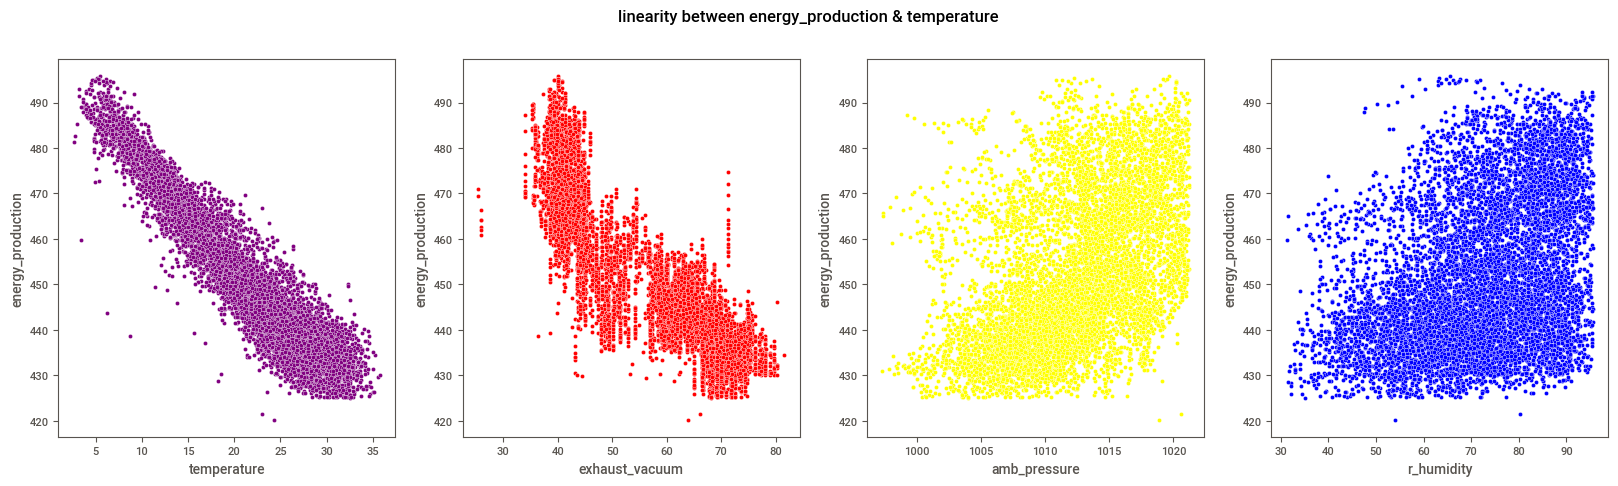

In [25]:
#linearity between 
fig, axs = plt.subplots(ncols=4,figsize=(20, 5))
plt.suptitle('linearity between energy_production & temperature')
sns.scatterplot(x="temperature",y='energy_production',data=df_clean,ax=axs[0],color = 'purple')
sns.scatterplot(x="exhaust_vacuum",y='energy_production',data=df_clean,ax=axs[1],color = 'red')
sns.scatterplot(x="amb_pressure",y='energy_production',data=df_clean,ax=axs[2],color = 'yellow')
sns.scatterplot(x="r_humidity",y='energy_production',data=df_clean,ax=axs[3],color = 'blue')

# Independent and dependent variables has linearity

# Distribution by Histogram and Q-Q plot

In [26]:
import scipy.stats as stats
def diagnostic_plots(df_clean, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

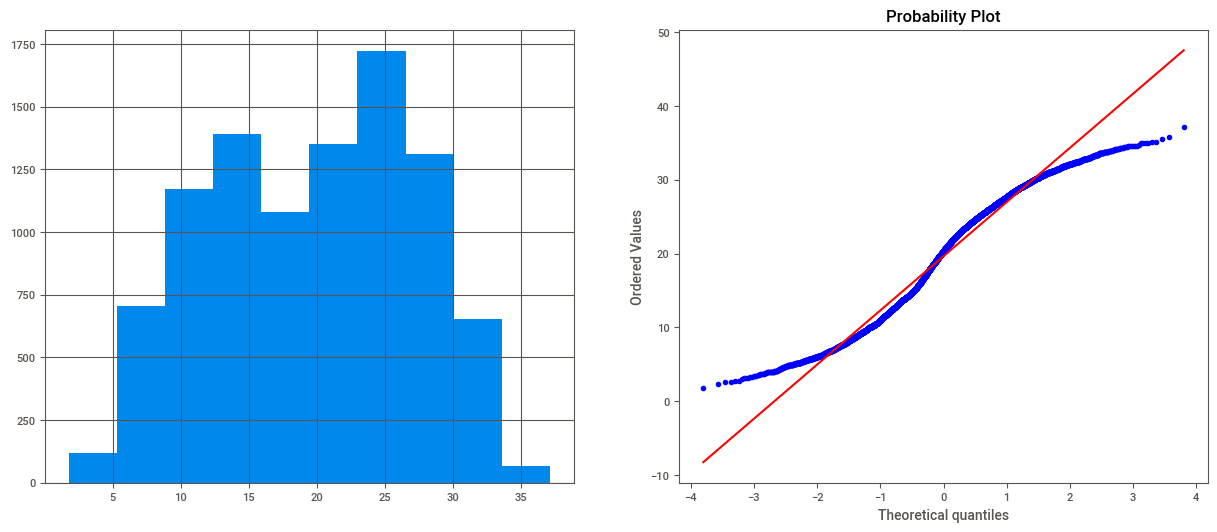

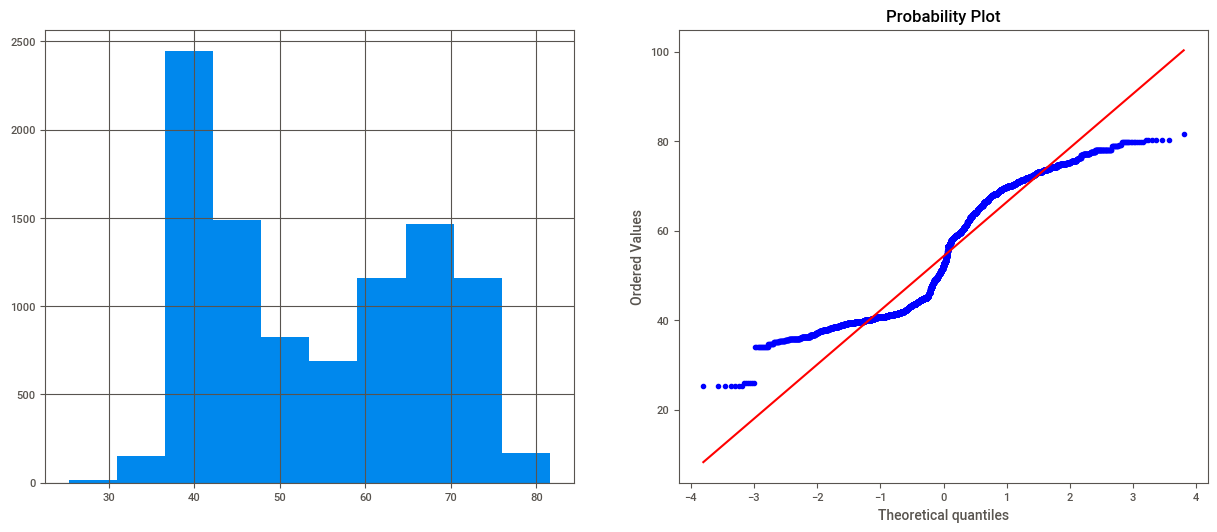

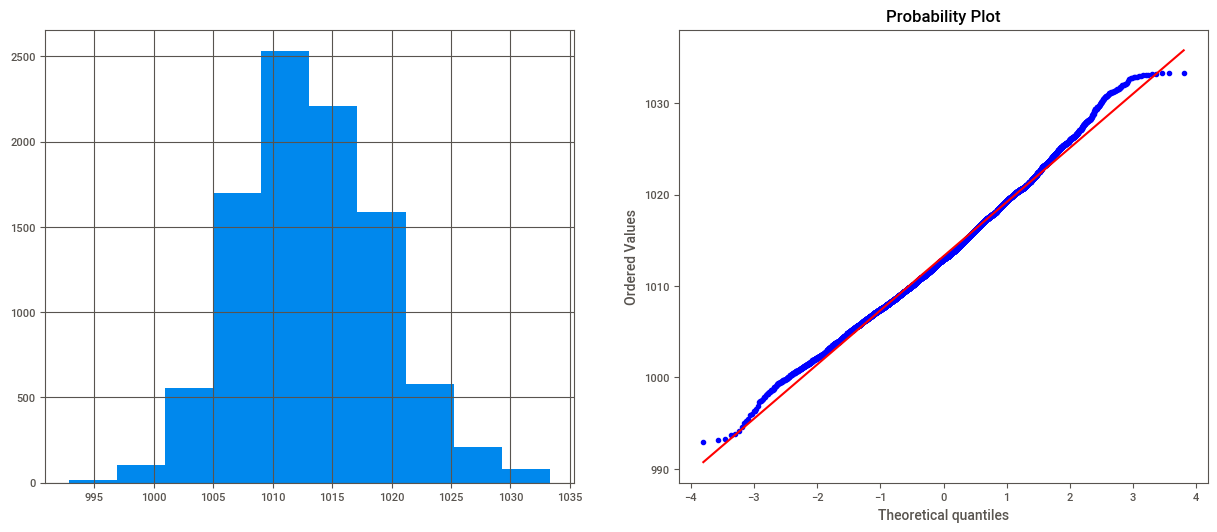

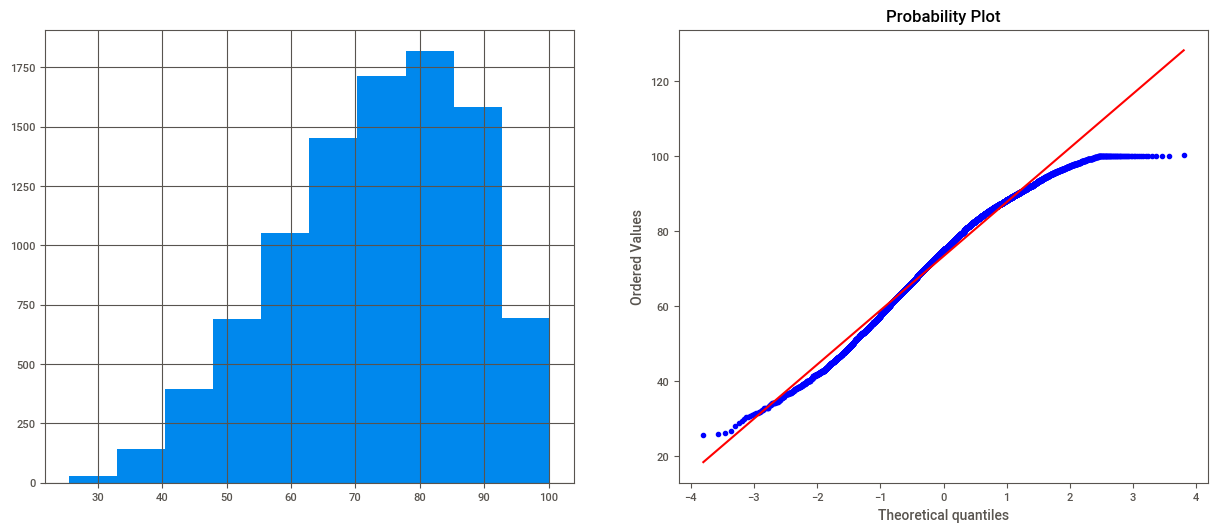

In [27]:
diagnostic_plots(df_clean, 'temperature')
diagnostic_plots(df_clean, 'exhaust_vacuum')
diagnostic_plots(df_clean, 'amb_pressure')
diagnostic_plots(df_clean, 'r_humidity')

# distribution of energy_production

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy_production', ylabel='Density'>

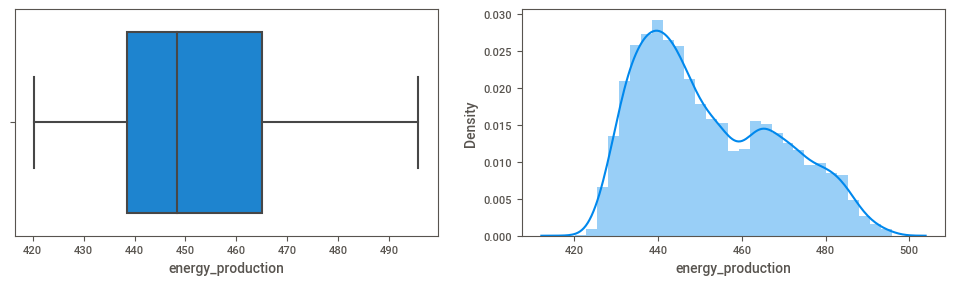

In [28]:
fig, axs = plt.subplots(ncols=2,figsize=(12, 3))
sns.boxplot(x='energy_production', data=df_clean, ax=axs[0])
sns.distplot(df_clean.energy_production, ax=axs[1])


# Correlation 

<AxesSubplot:>

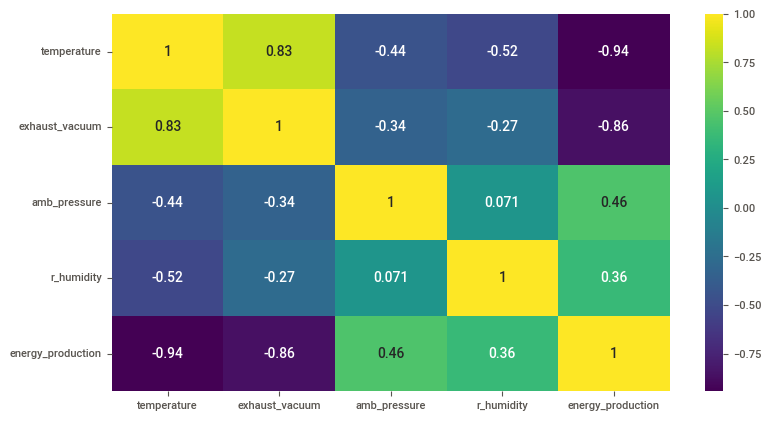

In [29]:
plt.figure(figsize = (9, 5))
sns.heatmap(df_clean.corr(), annot = True,cmap="viridis")

from the Correlation heatmap
Because of high positive Correlation between temp. and ext.vacuum (0.84)
there is chance of multicollinearity for that we checked # p_values

In [30]:
df1=df_clean.rename({'temperature':'AT','exhaust_vacuum':'EV','amb_pressure':'AP',
                     'r_humidity':'RH','energy_production':'EP'},axis=1)

In [31]:
df1.columns

Index(['AT', 'EV', 'AP', 'RH', 'EP'], dtype='object')

In [32]:
df1.head()

,AT,EV,AP,RH,EP
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
3,13.72,54.30,1017.89,79.08,467.05
5,23.63,60.93,1006.41,83.06,439.90
6,22.99,61.02,1009.88,81.56,440.85


In [33]:
import statsmodels.formula.api as smf
model = smf.ols('EP~AT + EV + AP + RH', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.560e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:45:53   Log-Likelihood:                -24378.
No. Observations:                8324   AIC:                         4.877e+04
Df Residuals:                    8319   BIC:                         4.880e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    406.6806     12.185     33.376      0.000     382.795     430.566
AT            -1.9432      0.016   -120.339      0.000      -1.975      -1.912
EV            -0.2434      0.008    -32.117      0.000      -0.258      -0.229
AP             0.1090      0.012      9.174      0.000       0.086       0.132
RH            -0.1542      0.005    -33.862      0.000      -0.163      -0.145
==============================================================================
Omnibus:                      512.615   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1774.065
Skew:                          -0.243   Prob(JB):                         0.00
Kurtosis:                       5.209   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# from the summary the p_values are less than 0.05 and std error and coefficient not much high so there is no multicollinearity






# Normalizing data

In [34]:
x=df1.iloc[:,0:4]
y=df1['EP']

In [35]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(x)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.30, random_state=31)

# Linear Model



# Fitting out model on training data and making testing predictions





In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
model1=lr.fit(x_train,y_train)

# prediction for test data

In [38]:
#making testing predictions
pred_test = model1.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 4.484139062135835


# prediction for train data

In [39]:
#making trainingS predictions
pred_train = model1.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 4.4776214134476


# For train and test  rmse  alues is almost same so ,our model is not overfitted

In [40]:
print('R2 Score:', metrics.r2_score(y_test, pred_test))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

R2 Score: 0.9254693198727549
Mean Absolute Error: 3.621166924175791
Mean Squared Error: 20.10750312857245
Root Mean Squared Error: 4.484139062135835


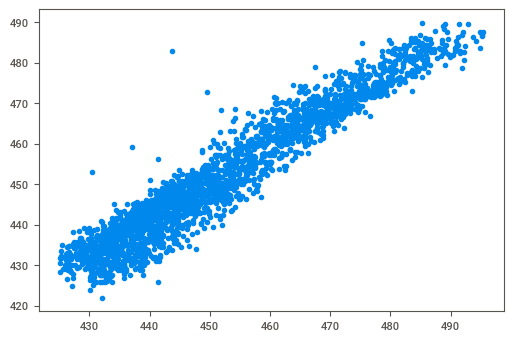

In [41]:
import  matplotlib.pyplot as plt
plt.scatter(y_test, pred_test)

# Logarithmic Transformation on r_humidity

In [42]:
#Relative humidity is highly skewd for that applying log trs.
df1['Log_rh']=np.log(df_clean['r_humidity']+1)

In [43]:
x1=df1[['AT','EV','AP','Log_rh']]
y1=df1['EP']
from sklearn import preprocessing
normalized_X1 = preprocessing.normalize(x1)
x_train, x_test, y_train, y_test = train_test_split(normalized_X1, y, test_size=0.20, random_state=30)
lr1=LinearRegression()
model2=lr1.fit(x_train,y_train)  
y_pred = model2.predict(x_test)
from sklearn import metrics
print('R2 Score:', metrics.r2_score(y_test, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.9269400560677277
Mean Absolute Error: 3.503485042890633
Mean Squared Error: 19.858720145205005
Root Mean Squared Error: 4.456312393134597


In [44]:
#making trainingS predictions
pred_train = model2.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 4.366823247225291


In [45]:
#model2 is not over fitted 

<AxesSubplot:>

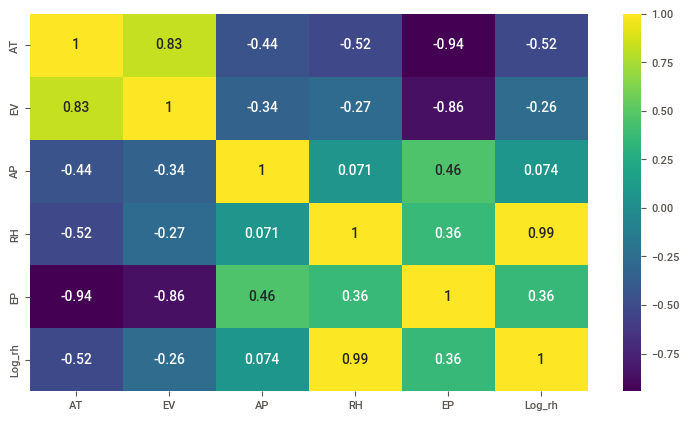

In [46]:
plt.figure(figsize = (9, 5))
sns.heatmap(df1.corr(), annot = True,cmap="viridis")

# Ridge Regression


In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [48]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-08}
0.9298603197189117


In [49]:
ridge_regressor.score(x_train,y_train)

0.9300751658357552

In [50]:
ridge_regressor.score(x_test,y_test)

0.9269403070384692

In [51]:
#making trainingS predictions
pred_train = ridge_regressor.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 4.366823260795109


In [52]:
#making testing predictions
pred_test = ridge_regressor.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 4.456304739111571


# Lasso Regression

In [53]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50371.40323732502, tolerance: 143.85171196001878
  model = cd_fast.enet_coordinate_descent(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51020.67928496216, tolerance: 145.12137272114887
  model = cd_fast.enet_coordinate_descent(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51142.77195214883, tolerance: 146.27394889580626
  model = cd_fast.enet_coordinate_descent(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

{'alpha': 1e-15}
0.9298603022242654


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63490.71888360671, tolerance: 181.59705443211595
  model = cd_fast.enet_coordinate_descent(


In [54]:
#making trainingS predictions
pred_train = lasso_regressor.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 4.366823253065811


In [55]:
#making testing predictions
pred_test = lasso_regressor.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 4.456304450705659


# Neural Network model(by keras library)

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [57]:
# create model
model2 = Sequential()
model2.add(Dense(120, input_dim=4,activation='linear'))
model2.add(Dense(60, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [58]:
# Compile model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [59]:
# Fit the model
history=model2.fit(x_train, y_train, epochs=60, batch_size=20)

Epoch 1/60
333/333 [==============================] - 2s 3ms/step - loss: 64305.4688 - mse: 64305.4688
Epoch 2/60
333/333 [==============================] - 1s 3ms/step - loss: 352.3009 - mse: 352.3009
Epoch 3/60
333/333 [==============================] - 1s 3ms/step - loss: 329.2276 - mse: 329.2276
Epoch 4/60
333/333 [==============================] - 1s 3ms/step - loss: 298.2659 - mse: 298.2659
Epoch 5/60
333/333 [==============================] - 1s 3ms/step - loss: 263.8844 - mse: 263.8844
Epoch 6/60
333/333 [==============================] - 1s 3ms/step - loss: 228.5184 - mse: 228.5184
Epoch 7/60
333/333 [==============================] - 1s 3ms/step - loss: 190.0969 - mse: 190.0969
Epoch 8/60
333/333 [==============================] - 1s 3ms/step - loss: 151.5145 - mse: 151.5144
Epoch 9/60
333/333 [==============================] - 1s 3ms/step - loss: 117.7967 - mse: 117.7967
Epoch 10/60
333/333 [==============================] - 1s 3ms/step - loss: 87.1071 - mse: 87.1071
Epoch 1

In [60]:
# evaluate the model
scores = model2.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

53/53 [==============================] - 0s 3ms/step - loss: 25.3077 - mse: 25.3077
mse: 2530.77%


In [61]:
y_pred=model2.predict(x_test)

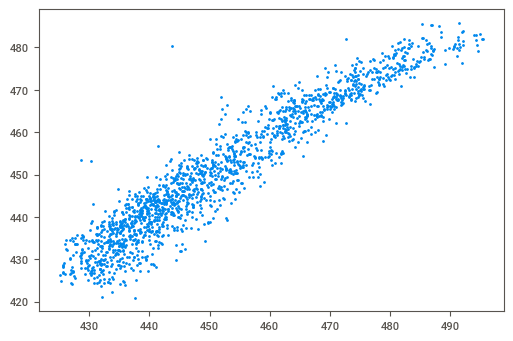

In [62]:
plt.scatter(y_test, y_pred, s=1)

In [63]:
#making testing predictions
pred_test = model2.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 5.030678251844537


In [64]:
#making trainingS predictions
pred_train = model2.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 5.002665293188323


# Random Forests

In [65]:
from sklearn.ensemble import RandomForestRegressor
r_f= RandomForestRegressor(n_estimators=102,
    min_samples_split=20,
    min_samples_leaf=28,
    max_features='auto')
r_f.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=28, min_samples_split=20,
                      n_estimators=102)

In [66]:
y_pred = r_f.predict(x_test)

In [67]:
#making testing predictions
pred_test = r_f.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 3.9946121109789194


In [68]:
#making trainingS predictions
pred_train = r_f.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 3.6277539740626166


In [69]:
print('R2 Score:', metrics.r2_score(y_test, pred_test))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

R2 Score: 0.9412947005488647
Mean Absolute Error: 3.0149690197969607
Mean Squared Error: 15.956925917179458
Root Mean Squared Error: 3.9946121109789194


# Decision_Tree_Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor  
DtReg = DecisionTreeRegressor(criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=6,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    ccp_alpha=0.1)
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=6)

In [71]:
#making testing predictions
pred_test = DtReg.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 4.412918114404582


In [72]:
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=6)

In [73]:
#making trainingS predictions
pred_train = DtReg.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 4.055937100219356


In [74]:
print('R2 Score:', metrics.r2_score(y_test, pred_test))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

R2 Score: 0.9283560014299101
Mean Absolute Error: 3.3658758887896907
Mean Squared Error: 19.47384628444009
Root Mean Squared Error: 4.412918114404582


# Random Forests model is best model values of rsquare & rmse is less compare to other model